# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [19]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [21]:
df = sinasc_raw
df['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [22]:
latitude = pd.cut(df['munResLat'],[-13.5,-10.5,-8.7])
df.pivot_table(index=latitude, values=['CONSULTAS','LOCNASC'], aggfunc=(sum, 'mean', min, max, np.median, 'std', np.var))   

CONSULTAS                                                  \
                     max      mean median min       std    sum       var   
munResLat                                                                  
(-13.5, -10.5]         9  3.694297    4.0   1  0.643372  48000  0.413928   
(-10.5, -8.7]          9  3.467436    4.0   1  0.888240  48662  0.788970   

               LOCNASC                                                  
                   max      mean median min       std    sum       var  
munResLat                                                               
(-13.5, -10.5]       4  1.009467    1.0   1  0.145180  13116  0.021077  
(-10.5, -8.7]        4  1.013182    1.0   1  0.175569  14219  0.030825

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [23]:
df.munResArea.max(), df.munResArea.min()

(34096.394, 459.978)

In [24]:
area = pd.cut(df['munResArea'], [450, 3000, 35000])
area.value_counts()

(3000, 35000]    21808
(450, 3000]       5219
Name: munResArea, dtype: int64

In [25]:
df.pivot_table(index=area, values=['NATURALMAE','ESTCIVMAE'], aggfunc=(sum, 'mean', min, max, np.median, 'std', np.var))

ESTCIVMAE                                                     \
                    max      mean median  min       std      sum       var   
munResArea                                                                   
(450, 3000]         9.0  2.578774    2.0  1.0  1.582431  13340.0  2.504089   
(3000, 35000]       9.0  2.537169    2.0  1.0  1.691778  54643.0  2.862114   

              NATURALMAE                                                   \
                     max        mean median    min        std         sum   
munResArea                                                                  
(450, 3000]        853.0  815.474495  811.0  811.0  10.363153   4236390.0   
(3000, 35000]      853.0  814.784769  811.0  811.0   9.770957  17546390.0   

                           
                      var  
munResArea                 
(450, 3000]    107.394950  
(3000, 35000]   95.471599

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [26]:
altitude = pd.qcut(df['munResAlt'], 4)
df.pivot_table(index=altitude, values=['STTRABPART', 'STCESPARTO'], aggfunc=(sum, 'mean', min, max, np.median, 'std', np.var))

STCESPARTO                                                     \
                      max      mean median  min       std      sum       var   
munResAlt                                                                      
(84.999, 87.0]        9.0  2.405340    3.0  1.0  1.410037  19731.0  1.988204   
(87.0, 153.0]         9.0  2.666944    2.0  1.0  1.828882  12812.0  3.344808   
(153.0, 191.0]        9.0  2.184092    2.0  1.0  1.124645  15020.0  1.264825   
(191.0, 595.0]        9.0  1.998437    2.0  1.0  0.961494  12782.0  0.924470   

               STTRABPART                                                     
                      max      mean median  min       std      sum       var  
munResAlt                                                                     
(84.999, 87.0]        9.0  1.967380    2.0  1.0  0.772250  15802.0  0.596371  
(87.0, 153.0]         9.0  1.988068    2.0  1.0  0.446539   9497.0  0.199397  
(153.0, 191.0]        9.0  1.985594    2.0  1.0  0.597084  13645.0  0.356509  
(191.0, 595.0]        9.0  2.005001    2.0  1.0  0.630555  12830.0  0.397599

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [27]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"}

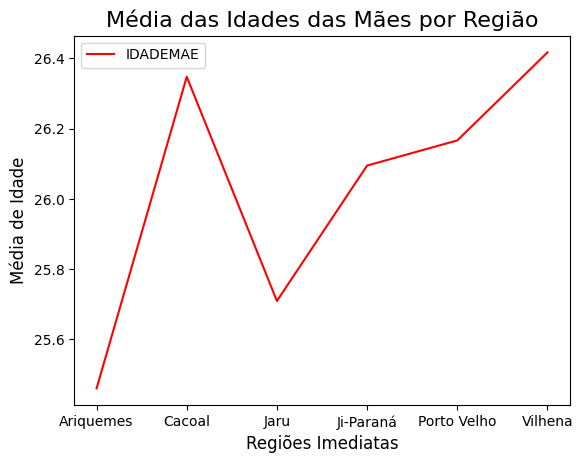

In [28]:
df2 = df[['munResNome', 'IDADEMAE']]
df2.set_index('munResNome', inplace=True)
df2.groupby(imediatas).mean().plot(color='r')
plt.title('Média das Idades das Mães por Região', fontsize=16)
plt.xlabel('Regiões Imediatas',fontsize=12)
plt.ylabel('Média de Idade',fontsize=12);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [29]:
idh = {
    "Nova Mamoré": "IDH-M baixo",
    "Candeias do Jamari": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Porto Velho": "IDH-M alto",
    "Alto Paraíso": "IDH-M médio",
    "Ariquemes": "IDH-M alto",
    "Buritis": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Cujubim": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
    "Alvorada D'Oeste": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "Ji-Paraná": "IDH-M alto",
    "Mirante da Serra": "IDH-M médio",
    "Nova União": "IDH-M baixo",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Teixeirópolis": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Cacoal": "IDH-M alto",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Castanheiras": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Pimenta Bueno": "IDH-M alto",
    "Primavera de Rondônia": "IDH-M médio",
    "Rolim de Moura": "IDH-M alto",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Vilhena": "IDH-M alto",
    "Cabixi": "IDH-M médio",
    "Cerejeiras": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio"
}

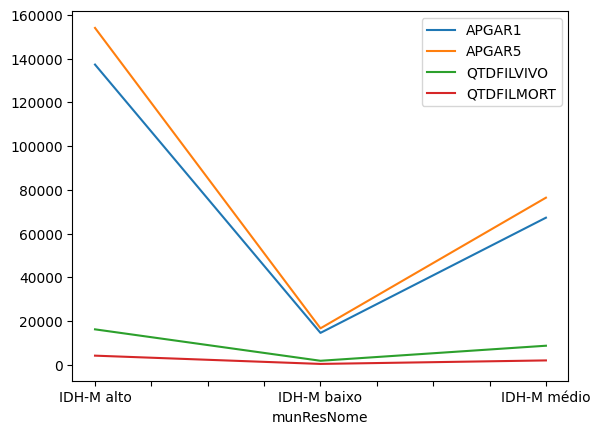

In [37]:
df3 = df.set_index('munResNome')
df3.groupby(idh)[['APGAR1', 'APGAR5', 'QTDFILVIVO', 'QTDFILMORT']].sum().plot();

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [31]:
ifdm = {
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Porto Velho": "Desenvolvimento moderado",
    "Alto Paraíso": "Desenvolvimento regular",
    "Ariquemes": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "Cacaulândia": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Monte Negro": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Governador Jorge Teixeira": "Desenvolvimento regular",
    "Machadinho D'Oeste": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Alvorada D'Oeste": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Mirante da Serra": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Seringueiras": "Desenvolvimento regular",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Cacoal": "Desenvolvimento moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento moderado",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Espigão D'Oeste": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento moderado",
    "São Felipe D'Oeste": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Cabixi": "Desenvolvimento regular",
    "Cerejeiras": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Corumbiara": "Desenvolvimento regular",
    "Pimenteiras do Oeste": "Desenvolvimento moderado"
}

In [32]:
df4 = df[['munResNome', 'QTDFILVIVO', 'QTDFILMORT']]
df4.set_index('munResNome', inplace=True)
df4.groupby(ifdm).sum()

,QTDFILVIVO,QTDFILMORT
munResNome,,
Desenvolvimento moderado,21074.0,5422.0
Desenvolvimento regular,5752.0,1221.0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [33]:
pib = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [34]:
df5 = df[['munResNome','QTDPARTCES', 'QTDPARTNOR']]
df5.set_index('munResNome', inplace=True)
df5.groupby(pib).sum()

,QTDPARTCES,QTDPARTNOR
munResNome,,
Acima de 1 Bilhão,8219.0,9368.0
Acima de 100 Milhões,1014.0,911.0
Acima de 200 Milhões,379.0,348.0
Acima de 300 Milhões,1027.0,865.0
Acima de 500 Milhões,2249.0,2890.0
Até 100 Milhões,248.0,189.0


#### IDH:
Os maiores índices de APGAR estão nos municípios com o IDH alto, e os menores índices estão onde o IDH é menor.
#### IFDM:
A quantidade de filhos mortos é relativamente maior em regiões com menos desenvolvilmento se comparado com a quantidade de filhos vivos;
#### PIB:
A quantidade de partos está mais ligada a quantidade de habitantes na região, o PIB não interfere nesse caso;
    